In [266]:
import plotly.offline as py
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from datetime import datetime 
from keras import utils
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error

from imblearn.combine import SMOTETomek
import sklearn.linear_model
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import gradient_boosting
from sklearn import linear_model, preprocessing,metrics
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,f1_score,roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier # Random Forest package
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees package
from sklearn.metrics import mean_squared_error, r2_score ,make_scorer, roc_auc_score, roc_curve 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from math import sqrt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import PolynomialFeatures

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import matplotlib
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [232]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [233]:
train = pd.read_csv('train.csv')

In [234]:
test = pd.read_csv('test.csv')

In [235]:
train.shape

(42000, 785)

In [236]:
test.shape

(28000, 784)

check for missing and duplicate values


In [208]:
train.isnull().values.any()

False

In [209]:
dups = train.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [210]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
print(train.shape)
print(test.shape)

(42000, 785)
(4428, 784)


Seperate the Y/X from Train

In [212]:
# y_train = train.label.astype('float32')
# X_train = train.drop(['label'],axis=1).astype('int32')
# x_test = test.astype('float32')
# X_train.shape,y_train.shape,x_test.shape

# For CNN

Reshape

In [213]:
#X_train = X_train.values.reshape(-1,28,28,1) # reshaping 784 to 28*28*1
#X_train = X_train / 255.0 #doing normalization dividing every pixel value by 255
#x_test = x_test.values.reshape(-1,28,28,1) # reshaping 784 to 28*28*1
#x_test = x_test / 255.0 #doing normalization dividing every pixel value by 255
#X_train.shape, x_test.shape #check the shapes

Convert the labels into categorical with one-hot encoding

In [214]:
#y_train = tf.keras.utils.to_categorical(y_train,10) # set to 10 since 0-9 inclusive
#y_train.shape

In [215]:
#Compare old train in original dataset
#train.label.head(5)

In [216]:
#New Categorical Values
#y_train[0:5]

In [217]:
#X_train.shape,y_train.shape

# Train Test Split

In [218]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]
test_df_copy = df_y

In [219]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


# Random Forest Kaggle Entry 1

In [220]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)

# Check the time to run the model
start=datetime.now()

# Fit data on to the model
rf.fit(X_train,y_train)

end=datetime.now()
print(end-start)

0:00:25.735956


In [221]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.96       860
           3       0.95      0.94      0.95       863
           4       0.96      0.97      0.97       827
           5       0.96      0.97      0.96       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.97       899
           8       0.95      0.95      0.95       768
           9       0.96      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Report
[[796   0   0   0   2   2   4   0   9   0]
 [  0 948   7   1   1   0   2   0   2   0]
 [  3   1 830   7   4   0   3   5   6   1]
 [  2   1  13 811   0  12   1   9  11   3]
 [  2   2   0   0 801   0   4 

In [222]:
#Cross validation
rf=RandomForestClassifier(n_estimators=100)
rf.fit(df_x, df_y)
score = cross_val_score(rf, df_x, df_y)
print (np.mean(score))

0.9636904761904763


In [237]:
#Predicting on test data
pred=rf.predict(test)

In [238]:
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

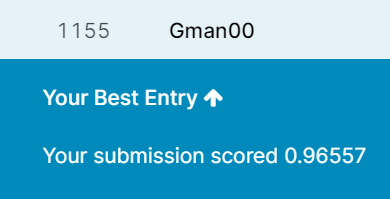

# PCA on Training and Test

In [256]:
pca = PCA(n_components=0.95, svd_solver='full',
          whiten=True).fit(X_train)

# Check the time to run the model
start=datetime.now()

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

rfr = RandomForestClassifier(n_estimators = 100, n_jobs = 1, random_state = 42, verbose = 1,class_weight='balanced',oob_score=True)

rfr = rfr.fit(X_train_pca, y_train)
# Check the time to run the model
print(end-start)
y_pred = rfr.predict(X_test_pca)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.2s finished


-1 day, 23:46:20.433906


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [241]:
X_train_pca.shape

(33600, 153)

In [ ]:
# # dividing the data into the input and output features to train make the model learn based on what to take in and what to throw out.
# df_x = train.loc[:, "pixel0":]
# df_y = train.loc[:, "label"]

# # Normalizing the images array to be in the range of 0-1 by dividing them by the max possible value. 
# # Here is it 255 as we have 255 value range for pixels of an image. 
# df_x = df_x/255.0
# test = test/255.0

In [ ]:
# standardized_scalar = StandardScaler()
# standardized_data = standardized_scalar.fit_transform(df_x)
# standardized_data.shape

In [ ]:
# cov_matrix = np.matmul(standardized_data.T, standardized_data)
# cov_matrix.shape

In [ ]:
# from scipy.linalg import eigh

# lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
# vectors.shape

In [ ]:
# vectors = vectors.T
# vectors.shape

In [ ]:
# new_coordinates = np.matmul(vectors, standardized_data.T)
# print(new_coordinates.shape)
# new_coordinates = np.vstack((new_coordinates, df_y)).T

In [ ]:
# df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
# df_new.head()

In [ ]:
# sb.FacetGrid(df_new, hue="labels", size=6).map(plt.scatter, "f1", "f2").add_legend()
# plt.show()

In [ ]:
# from sklearn import decomposition

# pca = decomposition.PCA(n_components=.95)
# #pca.n_components = .95
# pca_data = pca.fit_transform(standardized_data)
# pca_data.shape

# # //95% of variance
# # from sklearn.decomposition import PCA
# # pca = PCA(n_components = 0.95)
# # pca.fit(data_rescaled)
# # reduced = pca.transform(data_rescaled)

In [ ]:
# cov_matrix = np.matmul(standardized_data.T, standardized_data)
# cov_matrix.shape

In [ ]:
# pca_data = np.vstack((pca_data.T,df_y)).T

In [ ]:
# df_PCA = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
# df_PCA.head()

In [ ]:
# sb.FacetGrid(df_new, hue="labels", size=12).map(plt.scatter, "f1", "f2").add_legend()
# plt.savefig("PCA_FacetGrid.png")
# plt.show()

In [ ]:
# pca.explained_variance_ratio_

In [ ]:
# pca.n_components_

# After PCA Fit Random Forest Again 

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [251]:
#training random Forest
rfr=RandomForestClassifier(n_estimators=100)

# Check the time to run the model
start=datetime.now()

# Fit data on to the model
rfr.fit(X_train_pca,y_train)

end=datetime.now()
print(end-start)

0:00:58.952903


In [252]:
pred=rfr.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

ValueError: ignored

In [253]:
#Cross validation
frf=RandomForestClassifier(n_estimators=100)
frf.fit(df_x, df_y)
score = cross_val_score(frf,df_x, df_y)
print (np.mean(score))

0.9642380952380952


In [254]:
#Predicting on test data
pred=rf.predict(test)

In [255]:
pred = pd.Series(pred,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)

submission.to_csv("mnist_rf2_PCA.csv",index=False)

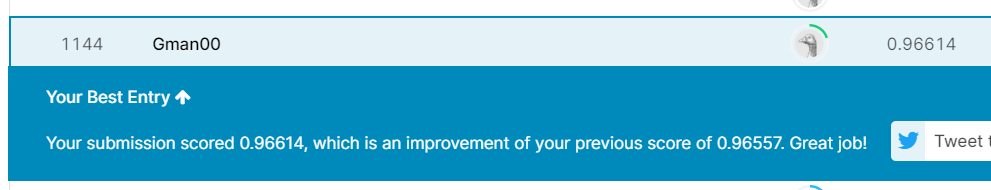

# Kmeans Clustering

In [278]:
kmeans=KMeans(10)
X_clustered=kmeans.fit_predict(X_train)
X_clustered

array([7, 4, 0, ..., 0, 9, 0], dtype=int32)

In [273]:
X_clustered.shape

(33600,)

In [282]:
#Cross validation
kmeans.fit(df_x, df_y)
score = cross_val_score(kmeans,df_x, df_y)
print (np.mean(score))

-21463679837.84179


In [279]:
pred=kmeans.predict(test)

In [283]:
pred = pd.Series(pred,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)

submission.to_csv("mnist_Kmeans_.csv",index=False)

In [270]:
# tracekmeans = go.Scatter(x= X_train, y= y_train, mode="markers",
#                     showlegend=False,
#                     marker=dict(
#                             size=8,
#                             color = X_clustered,
#                             colorscale = 'Portland',
#                             showscale=False, 
#                             line = dict(
#             width = 2,
#             color = 'rgb(255, 255, 255)'
#         )
#                    ))


# layout=go.Layout(title='Kmeans clustering',
#                  hovermode='closest',
#                  xaxis=dict(title='first principal direction',
#                            ticklen=5,
#                            zeroline=False,
#                            gridwidth=2),
#                  yaxis=dict(title='second principal component',
#                            ticklen=5,
#                            gridwidth=2),
#                  showlegend=True
#                      )

# data = [tracekmeans]
# fig1 = dict(data=data, layout= layout)
# py.iplot(fig1, filename="svm")
# tracekmeans

In [271]:
# x_clusters_df=pd.DataFrame(X_clustered, dtype=int)
# x_clusters_df.columns=['Cluster']
# targeted_df=pd.DataFrame(y_train,dtype=int)